In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
print(cv2.__version__)

4.9.0


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root= './datasets/Rice_Image_Dataset/original/'

image_data_generator = ImageDataGenerator(rescale=1./255)

generator = image_data_generator.flow_from_directory(
    root,
    target_size=(244,244),
    batch_size=32,
    class_mode='categorical'
)

print(generator.class_indices)

Found 75000 images belonging to 5 classes.
{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}


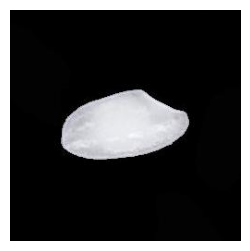

In [37]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(generator.filepaths[5]), cv2.COLOR_BGR2RGB)

def show_image(image) :
    plt.figure(figsize=(3,3))
    plt.imshow(image)
    plt.axis('off')

show_image(image)

In [38]:
import pandas as pd

r_df = pd.DataFrame({'file_paths' : generator.filepaths, 'targets' : generator.classes})
r_df.loc[:, 'file_paths'] = r_df.file_paths.apply(lambda x: x.replace('\\', '/'))
r_df

,file_paths,targets
0,./datasets/Rice_Image_Dataset/original/Arborio...,0
1,./datasets/Rice_Image_Dataset/original/Arborio...,0
2,./datasets/Rice_Image_Dataset/original/Arborio...,0
3,./datasets/Rice_Image_Dataset/original/Arborio...,0
4,./datasets/Rice_Image_Dataset/original/Arborio...,0
...,...,...
74995,./datasets/Rice_Image_Dataset/original/Karacad...,4
74996,./datasets/Rice_Image_Dataset/original/Karacad...,4
74997,./datasets/Rice_Image_Dataset/original/Karacad...,4
74998,./datasets/Rice_Image_Dataset/original/Karacad...,4


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(r_df.file_paths, r_df.targets, stratify=r_df.targets, test_size=0.2, random_state=124)
print(y_train.value_counts())
print(y_test.value_counts())

targets
4    12000
0    12000
1    12000
2    12000
3    12000
Name: count, dtype: int64
targets
4    3000
1    3000
2    3000
3    3000
0    3000
Name: count, dtype: int64


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)
print(y_val.value_counts())

targets
1    2400
4    2400
2    2400
0    2400
3    2400
Name: count, dtype: int64


In [8]:
# rindex, rfind => 찾고자 하는 요소가 중복되어 있을 때, 뒤에 있는 요소부터 우선적으로 찾고자 한다.

In [200]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/Rice_Image_Dataset/train'
validation_dir = './datasets/Rice_Image_Dataset/validation'
test_dir = './datasets/Rice_Image_Dataset/test'

train_data_generator = ImageDataGenerator(rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 48000 images belonging to 5 classes.
Found 12000 images belonging to 5 classes.
Found 12000 images belonging to 4 classes.
{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}
{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}
{'Arborio': 0, 'Basmati': 1, 'Jasmine': 2, 'Karacadag': 3}


In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
#-----------------------------------------------------
x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu', name='32')(x)
x = Conv2D(filters=32, kernel_size=3, strides=2, padding="same", kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu', name='32-result')(x)
x = MaxPooling2D(2)(x)
#-----------------------------------------------------
x = Conv2D(filters=64, kernel_size=3, strides=2, padding="same", kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu', name='64')(x)
x = Conv2D(filters=64, kernel_size=3, strides=2, padding="same", kernel_initializer="he_normal")(x)
x = BatchNormalization()(x)
x = Activation('relu', name='64-result')(x)
x = MaxPooling2D(2)(x)
#-----------------------------------------------------
x = Conv2D(filters=128, kernel_size=3, strides=1, padding="same", kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu', name='128')(x)
x = Conv2D(filters=128, kernel_size=3, strides=1, padding="same", kernel_initializer="he_normal")(x)
x = BatchNormalization()(x)
x = Activation('relu', name='128-result')(x)
#-----------------------------------------------------
x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(600, activation='relu')(x)
x = Dropout(rate=0.3)(x)
output = Dense(5, activation='softmax', kernel_initializer='glorot_uniform')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 122, 122, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 122, 122, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 32 (Activation)                      │ (None, 122, 122, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 32-result (Activation)               │ (None, 61, 61, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 64 (Activation)                      │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 64-result (Activation)               │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 128 (Activation)                     │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │         147,5

 Total params: 369,205 (1.41 MB)

 Trainable params: 368,309 (1.40 MB)

 Non-trainable params: 896 (3.50 KB)

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [14]:
history = model.fit(
    train_generator,
    batch_size=32,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb]
)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 214s 138ms/step - acc: 0.9108 - loss: 0.2491 - val_acc: 0.7959 - val_loss: 0.6671 - learning_rate: 0.0010
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 242s 161ms/step - acc: 0.9826 - loss: 0.0553 - val_acc: 0.9780 - val_loss: 0.0697 - learning_rate: 0.0010
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 232s 155ms/step - acc: 0.9878 - loss: 0.0371 - val_acc: 0.7382 - val_loss: 0.8662 - learning_rate: 0.0010
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 240s 160ms/step - acc: 0.9877 - loss: 0.0389 - val_acc: 0.9732 - val_loss: 0.0816 - learning_rate: 0.0010
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 230s 153ms/step - acc: 0.9956 - loss: 0.0170 - val_acc: 0.9968 - val_loss: 0.0107 - learning_rate: 1.0000e-04
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 240s 160ms/step - acc: 0.9962 - loss: 0.0122 - val_acc: 0.9974 - val_loss: 0.0098 - learning_rate: 1.0000e-04
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 235s 156ms/step - acc: 0.9975 - loss: 0.0085 - val_acc: 0.9972

In [15]:
model.evaluate(test_generator, batch_size=32)

469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - acc: 0.9984 - loss: 0.0053


[0.00528751453384757, 0.9984666705131531]

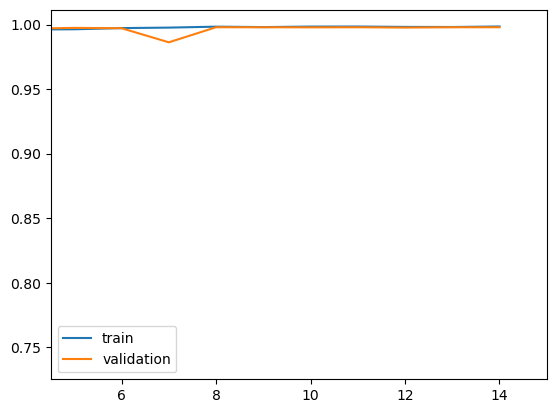

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.xlim(4.5, 15)
plt.legend()

In [19]:
import numpy as np
import cv2

# 이미지 로드 및 전처리
image = cv2.cvtColor(cv2.imread('./datasets/Rice_Image_Dataset/Basmati.jpg'), cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
resized_image = np.expand_dims(resized_image, axis=0)

# 클래스 이름
class_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

# 예측 수행
predictions = model.predict(resized_image, batch_size=8)

# 가장 높은 확률을 가진 클래스 인덱스
predicted_class_index = np.argmax(predictions, axis=1)[0]

# 예측된 클래스 이름 출력
predicted_class_name = class_names[predicted_class_index]
print(predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Basmati


In [42]:
y_pred = model.predict(test_generator, batch_size=32)
y_predict = np.argmax(y_pred, axis=1)
y_predict


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step


array([0, 2, 4, ..., 0, 4, 1], dtype=int64)

In [109]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root= './datasets/Rice_Image_Dataset/train/'

image_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = image_data_generator.flow_from_directory(
    root,
    target_size=(244,244),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)

Found 48000 images belonging to 5 classes.
{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}


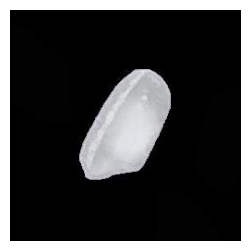

In [106]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(generator.filepaths[5]), cv2.COLOR_BGR2RGB)

def show_image(image) :
    plt.figure(figsize=(3,3))
    plt.imshow(image)
    plt.axis('off')

show_image(image)

In [111]:
import pandas as pd

train_df = pd.DataFrame({'filepaths' : train_generator.filepaths, 'targets' : train_generator.classes})
train_df.loc[:, 'filepaths'] = train_df.filepaths.apply(lambda x: x.replace('\\', '/'))
train_df

,filepaths,targets
0,./datasets/Rice_Image_Dataset/train/Arborio/Ar...,0
1,./datasets/Rice_Image_Dataset/train/Arborio/Ar...,0
2,./datasets/Rice_Image_Dataset/train/Arborio/Ar...,0
3,./datasets/Rice_Image_Dataset/train/Arborio/Ar...,0
4,./datasets/Rice_Image_Dataset/train/Arborio/Ar...,0
...,...,...
47995,./datasets/Rice_Image_Dataset/train/Karacadag/...,4
47996,./datasets/Rice_Image_Dataset/train/Karacadag/...,4
47997,./datasets/Rice_Image_Dataset/train/Karacadag/...,4
47998,./datasets/Rice_Image_Dataset/train/Karacadag/...,4


In [112]:
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different targets: {len(train_df.targets.unique())}\n')
print(f'Targets: {train_df.targets.unique()}')

Number of pictures: 48000

Number of different targets: 5

Targets: [0 1 2 3 4]


In [120]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.load_weights('./callback_files/weights.012-0.0074-0.9985.weights.h5')
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [123]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint


mcp_cb = ModelCheckpoint(
    filepath='./callback_files/model.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.model.keras',
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=False,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='auto'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='auto'
)



history = model.fit(
    train_generator,
    batch_size=32,
    epochs=1,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb]
)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 547s 361ms/step - acc: 0.9913 - loss: 0.0284 - val_acc: 0.9291 - val_loss: 0.2331 - learning_rate: 0.0010


In [114]:
model.evaluate(test_generator, batch_size=32)

469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - acc: 0.9984 - loss: 0.0072


[0.005163722671568394, 0.998533308506012]

In [170]:
class_names

['Arborio', 'Basmati', 'Jasmine', 'Karacadag']

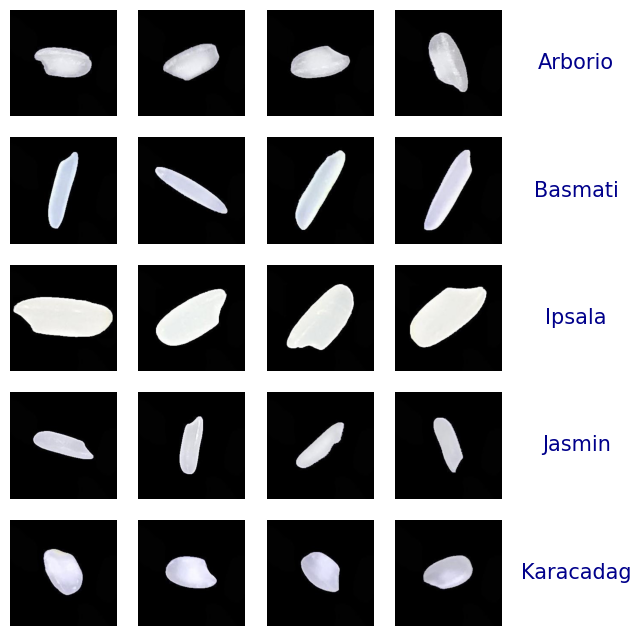

In [210]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8, 8))
gs = GridSpec(5, 5, figure=fig)

class_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmin','Karacadag']

for i, category in enumerate(train_df['targets'].unique()):
    filepaths = train_df[train_df['targets'] == category]['filepaths'].values[:4]
    
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')

    # 클래스 이름 추가
    ax = fig.add_subplot(gs[i, 4])
    ax.text(0.5, 0.5, class_names[i], fontsize=15, color='darkblue', ha='center', va='center')
    ax.axis('off')

plt.show()


In [169]:
train_df

,filepaths,targets
0,./datasets/Rice_Image_Dataset/train/Arborio/Ar...,0
1,./datasets/Rice_Image_Dataset/train/Arborio/Ar...,0
2,./datasets/Rice_Image_Dataset/train/Arborio/Ar...,0
3,./datasets/Rice_Image_Dataset/train/Arborio/Ar...,0
4,./datasets/Rice_Image_Dataset/train/Arborio/Ar...,0
...,...,...
47995,./datasets/Rice_Image_Dataset/train/Karacadag/...,4
47996,./datasets/Rice_Image_Dataset/train/Karacadag/...,4
47997,./datasets/Rice_Image_Dataset/train/Karacadag/...,4
47998,./datasets/Rice_Image_Dataset/train/Karacadag/...,4


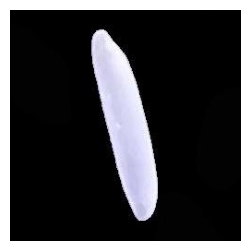

In [209]:
import cv2
import matplotlib.pyplot as plt

image_path = './datasets/Rice_Image_Dataset/test/Basmati/basmati (10008).jpg'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

def show_image(image) :
    plt.figure(figsize=(3,3))
    plt.imshow(image)
    plt.axis('off')

show_image(image)

In [202]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# 모델 로드 (필요시 모델 파일 경로 수정)
# model = load_model('./callback_files/model.001-0.2331-0.9909.model.keras')
IMAGE_SIZE=244
# 모델의 입력 크기 확인
input_shape = model.input_shape[1:3]  # (height, width) 형태로 가져옴
print(f'Model expected input shape: {input_shape}')

# 이미지 로드 및 전처리
image_path = './datasets/Rice_Image_Dataset/test/Basmati/basmati (10008).jpg'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE)) # 모델 입력 크기에 맞게 조정
resized_image = np.expand_dims(resized_image, axis=0)

# 클래스 이름 리스트 
class_names = ['Arborio', 'Basmati', 'Ipsala','Jasmine', 'Karacadag']

# 예측 수행
predictions = model.predict(resized_image, batch_size=32)

# 가장 높은 확률을 가진 클래스 인덱스
predicted_class_index = np.argmax(predictions, axis=1)[0]

# 예측된 클래스 이름 출력
predicted_class_name = class_names[predicted_class_index]
print(predicted_class_name)


Model expected input shape: (244, 244)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Basmati


In [180]:
import albumentations as A

def transform(image) : 
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.OneOf([
            A.ColorJitter(p=1),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
        ], p=1)
    ], 0.5)

    return aug(image=image)['image']

idg = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
generator = idg.flow_from_directory(
    root,
    target_size=(250, 250),
    batch_size=32,
    class_mode='categorical'
)

print(generator.class_indices)

Found 48000 images belonging to 5 classes.
{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}


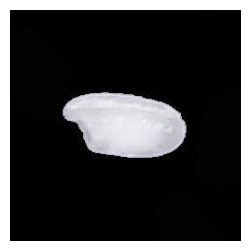

In [208]:
import cv2
import matplotlib.pyplot as plt

image_path = './datasets/Rice_Image_Dataset/original/Arborio/Arborio (1).jpg'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

def show_image(image) :
    plt.figure(figsize=(3,3))
    plt.imshow(image)
    plt.axis('off')

show_image(image)

In [211]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# 모델 로드 (필요시 모델 파일 경로 수정)
# model = load_model('./callback_files/model.001-0.2331-0.9909.model.keras')
IMAGE_SIZE=244
# 모델의 입력 크기 확인
input_shape = model.input_shape[1:3]  # (height, width) 형태로 가져옴
print(f'Model expected input shape: {input_shape}')

# 이미지 로드 및 전처리
image_path = './datasets/Rice_Image_Dataset/original/Arborio/Arborio (1).jpg'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE)) # 모델 입력 크기에 맞게 조정
resized_image = np.expand_dims(resized_image, axis=0)

# 클래스 이름 리스트 
class_names = ['Arborio', 'Basmati', 'Ipsala','Jasmine', 'Karacadag']

# 예측 수행
predictions = model.predict(resized_image, batch_size=32)

# 가장 높은 확률을 가진 클래스 인덱스
predicted_class_index = np.argmax(predictions, axis=1)[0]

# 예측된 클래스 이름 출력
predicted_class_name = class_names[predicted_class_index]
print(predicted_class_name)


Model expected input shape: (244, 244)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Arborio


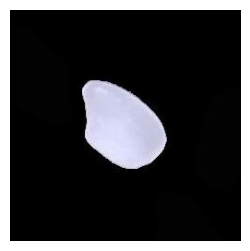

In [213]:
import cv2
import matplotlib.pyplot as plt

image_path = './datasets/Rice_Image_Dataset/original/Karacadag/Karacadag (10031).jpg'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

def show_image(image) :
    plt.figure(figsize=(3,3))
    plt.imshow(image)
    plt.axis('off')

show_image(image)

In [212]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model


IMAGE_SIZE=244
# 모델의 입력 크기 확인
input_shape = model.input_shape[1:3]  # (height, width) 형태로 가져옴
print(f'Model expected input shape: {input_shape}')

# 이미지 로드 및 전처리
image_path = './datasets/Rice_Image_Dataset/original/Karacadag/Karacadag (10031).jpg'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE)) # 모델 입력 크기에 맞게 조정
resized_image = np.expand_dims(resized_image, axis=0)

# 클래스 이름 리스트 
class_names = ['Arborio', 'Basmati', 'Ipsala','Jasmine', 'Karacadag']

# 예측 수행
predictions = model.predict(resized_image, batch_size=32)

# 가장 높은 확률을 가진 클래스 인덱스
predicted_class_index = np.argmax(predictions, axis=1)[0]

# 예측된 클래스 이름 출력
predicted_class_name = class_names[predicted_class_index]
print(predicted_class_name)

Model expected input shape: (244, 244)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Karacadag


In [195]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Set the input shape for the model
input_shape = (244, 244, 3)

# Create a Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 242, 242, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 121, 121, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 119, 119, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 59, 59, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 222784)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      28,516,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,536,517 (108.86 MB)

 Trainable params: 28,536,517 (108.86 MB)

 Non-trainable params: 0 (0.00 B)

In [196]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [187]:
model.save('./callback_files/weights.012-0.0074-0.9985.weights.h5')

<Functional name=functional_1, built=True>